Варіант 31 Виконав: Стаськів М.А. КН-414

In [ ]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mu, sigma = 31, 0.1*31 # mean and standard deviation
vars = [10,50,100,200,500]
arr = []
for i in vars:
    arr.append(np.random.normal(mu, sigma, i))

Найкращими точковими оцінками значень математичного очікування  і дисперсії  випадкової величини  є середнє арифметичне  і статистична дисперсія .

In [ ]:
means = []
stds = []
for i in arr:
    means.append(i.mean())
    stds.append(i.std())
    
print("Mean: ", means)
print("\nStd: ", stds)

Mean:  [31.783559092232586, 31.35784598819839, 31.148480205651484, 30.847216169389245, 31.10123515099193]

Std:  [2.9208923587130737, 2.7607154065655517, 3.119399322102489, 3.37175343007671, 3.191211806517015]


[]

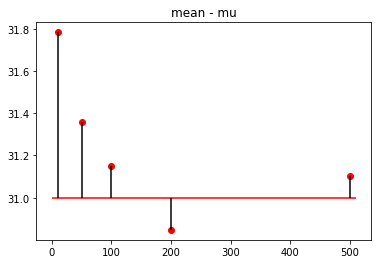

In [ ]:
plt.scatter(vars, means, color='red')
plt.hlines(y = mu, xmin = 0, xmax = max(vars)+10, color = 'red')

for i in range(len(vars)):
    plt.vlines(x = vars[i], ymin = min(means[i], mu), ymax = max(means[i], mu))
plt.title("mean - mu")
plt.plot()

[]

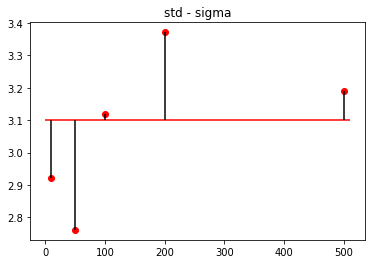

In [ ]:
plt.scatter(vars, stds, color='red')
plt.hlines(y = sigma, xmin = 0, xmax = max(vars)+10, color = 'red')

for i in range(len(vars)):
    plt.vlines(x = vars[i], ymin = min(stds[i],sigma), ymax = max(stds[i],sigma))
plt.title("std - sigma")
plt.plot()

In [ ]:
from scipy.stats import t
intervals = []
errors = []

for i in range(len(arr)):
    x = arr[i]
    m = means[i]
    s = stds[i]

    dof = len(x)-1 
    confidence = 0.95 
    t_crit = np.abs(t.ppf((1-confidence)/2,dof)) 
    
    pair = (m - s * t_crit / np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))
    
    errors.append(t_crit)
    intervals.append(pair)
    
intervals

[(29.69407857188309, 33.87303961258208),
 (30.573259351764577, 32.14243262463221),
 (30.52952370430744, 31.76743670699553),
 (30.377064318287072, 31.31736802049142),
 (30.82083814641869, 31.381632155565168)]

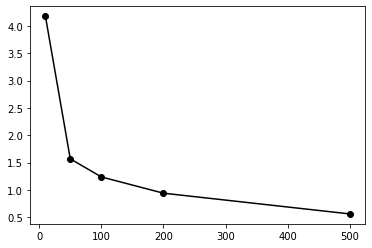

In [ ]:
longs = []
z = 0
for i in intervals:
    longs.append(i[1]-i[0])
    z+=1
    
plt.scatter(vars, longs, color='black')
plt.plot(vars, longs, color='black')

In [ ]:
# - від довірчої імовірності Р при сталому обсязі вибірки (n=100).
confidences = []
inters = []

confidence = 0.5
for i in range(5):
    x = arr[2]
    m = means[i]
    s = stds[i]

    dof = len(x)-1
    t_crit = np.abs(t.ppf((1-confidence)/2,dof)) #стандартна помилка
    
    pair = (m - s * t_crit / np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))
    
    confidences.append(confidence)
    inters.append(pair)
    confidence += 0.1
    
inters, confidences

([(31.585821693912166, 31.981296490553007),
  (31.12449181642193, 31.591200159974854),
  (30.82347287284156, 31.47348753846141),
  (30.41220554263835, 31.28222679614014),
  (30.571369164946717, 31.63110113703714)],
 [0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999])

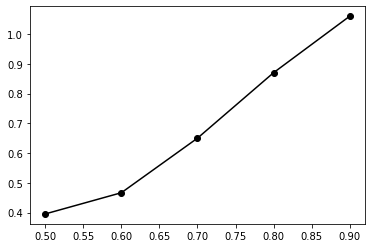

In [ ]:
longs = []
z = 0
for i in inters:
    longs.append(i[1]-i[0])
    z+=1
    
plt.scatter(confidences, longs, color='black')
plt.plot(confidences, longs, color='black')

In [ ]:
path2 = "/content/drive/MyDrive/MatStat1/lab1/population-past-future.csv"

In [ ]:
df = pd.read_csv(path2)

In [ ]:
df

,Entity,Code,Year,Population (historical estimates and future projections)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166
...,...,...,...,...
74769,Zimbabwe,ZWE,2096,30940779
74770,Zimbabwe,ZWE,2097,30952208
74771,Zimbabwe,ZWE,2098,30959811
74772,Zimbabwe,ZWE,2099,30964052


In [ ]:
labels = ['Ecuador', 'El Salvador','Eritrea', 'Equatorial Guinea', 'Estonia',]

In [ ]:
df = df[df['Entity'].isin(labels)]
df = df[(df['Year'] > 1960) & (df['Year'] < 2022)]
df.reset_index(inplace=True)
df

,index,Entity,Code,Year,Population (historical estimates and future projections)
0,19350,Ecuador,ECU,1961,4674176
1,19351,Ecuador,ECU,1962,4809194
2,19352,Ecuador,ECU,1963,4948991
3,19353,Ecuador,ECU,1964,5093848
4,19354,Ecuador,ECU,1965,5243980
...,...,...,...,...,...
300,21096,Estonia,EST,2017,1319389
301,21097,Estonia,EST,2018,1322913
302,21098,Estonia,EST,2019,1325649
303,21099,Estonia,EST,2020,1326539


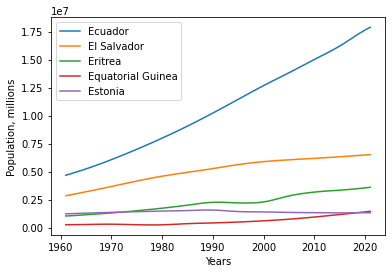

In [ ]:
for country in labels:
    vals = df[df['Entity'] == country]
    plt.plot(vals['Year'], vals['Population (historical estimates and future projections)'], label=country)


plt.xlabel("Years")
plt.ylabel("Population, millions")
plt.legend()
plt.show()

In [ ]:
# нормальний розподіл, we would expect the null hypothesis to be not rejected.
from scipy import stats

for country in labels:
    vals = df[df['Entity'] == country]
    print(stats.kstest(vals['Population (historical estimates and future projections)'],
             "norm", alternative='less'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


p-значення нижче за наше порогове значення 0,05, тому ми відкидаємо нульову гіпотезу на користь: дані не розподіляються відповідно до нормального розподілу.

In [ ]:
# рівномірний розподіл, we would expect the null hypothesis to be not rejected.
from scipy import stats

for country in labels:
    vals = df[df['Entity'] == country]
    print(stats.kstest(vals['Population (historical estimates and future projections)'],
             stats.uniform(min(vals['Population (historical estimates and future projections)']), 
                           max(vals['Population (historical estimates and future projections)'])).cdf))

KstestResult(statistic=0.26129540172068344, pvalue=0.0003656983750299532)
KstestResult(statistic=0.4366957122037278, pvalue=4.223496360423022e-11)
KstestResult(statistic=0.3061313506096991, pvalue=1.4277209402572756e-05)
KstestResult(statistic=0.4034065262859613, pvalue=1.7709217275677666e-09)
KstestResult(statistic=0.7837769838474312, pvalue=2.8137844806190923e-40)


p-значення нижче за наше порогове значення 0,05, тому ми відкидаємо нульову гіпотезу на користь: дані не розподіляються відповідно до рівномірного розподілу.

In [ ]:
# експоненціальний розподіл, we would expect the null hypothesis to be not rejected.
from scipy import stats

for country in labels:
    vals = df[df['Entity'] == country]
    print(stats.kstest(vals['Population (historical estimates and future projections)'],
                      stats.expon(1/vals['Population (historical estimates and future projections)'].mean()).cdf))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


p-значення нижче за наше порогове значення 0,05, тому ми відкидаємо нульову гіпотезу на користь: дані не розподіляються відповідно до експоненціального розподілу.

In [ ]:
# нормальний розподіл
for country in labels:
    vals = df[df['Entity'] == country]
    print(stats.anderson(vals['Population (historical estimates and future projections)'],
             dist='norm'))

AndersonResult(statistic=0.8528274237444222, critical_values=array([0.544, 0.62 , 0.743, 0.867, 1.031]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.670545346757983, critical_values=array([0.544, 0.62 , 0.743, 0.867, 1.031]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.1000695807694143, critical_values=array([0.544, 0.62 , 0.743, 0.867, 1.031]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=3.599273387797595, critical_values=array([0.544, 0.62 , 0.743, 0.867, 1.031]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.0259096468724707, critical_values=array([0.544, 0.62 , 0.743, 0.867, 1.031]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


Якщо повернута statistic більша за critical_values, тоді нульову гіпотезу про те, що дані походять із вибраного розподілу, можна відхилити.



In [ ]:
# експоненціальний розподіл
for country in labels:
    vals = df[df['Entity'] == country]
    print(stats.anderson(vals['Population (historical estimates and future projections)'],
             dist='expon'))

AndersonResult(statistic=10.758522555420782, critical_values=array([0.913, 1.068, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=17.140747188833117, critical_values=array([0.913, 1.068, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=11.76857804274934, critical_values=array([0.913, 1.068, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=5.787101136977782, critical_values=array([0.913, 1.068, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=24.71168248162155, critical_values=array([0.913, 1.068, 1.328, 1.59 , 1.938]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [ ]:
# нормальний розподіл
for country in labels:
    vals = df[df['Entity'] == country]
    print(stats.shapiro(vals['Population (historical estimates and future projections)']).pvalue)

0.009754086844623089
0.0003721383400261402
0.003731505014002323
1.0630034239511588e-06
0.021022913977503777


p-значення нижче за наше порогове значення 0,05, тому дані не розподіляються відповідно до нормального розподілу

In [ ]:
# нормальний розподіл
for country in labels:
    vals = df[df['Entity'] == country]
    p = stats.normaltest(vals['Population (historical estimates and future projections)']).pvalue
    print(p)

0.0001103145102077193
0.005268117884217649
0.002056259289629064
0.008934939585387405
0.11513675260737505
